# Case Study: Neuro

## Import Packages

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import glob
import pandas as pd
import math
import matplotlib.pyplot as plt

# import from absolute directory
srcdir='/Users/pengzhizhang/cellDancer/src'
sys.path.append(srcdir)
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap
from celldancer.velocity_estimation import velocity
from celldancer.compute_cell_velocity import compute
from celldancer.pseudo_time import pseudo_time
from celldancer.embedding_kinetic_para import embedding

## Velocity Estimation for Sample Genes

In [ ]:
%autoreload 2

cell_type_u_s_path="/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/raw_data/DentateGyrus.csv"
#cell_type_u_s_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/raw_data/DentateGyrus.csv'
#cell_type_u_s_path='/Users/chen.weiqing/code/celldancer/DentateGyrus.csv'
cell_type_u_s=pd.read_csv(raw_path)
cell_type_u_s

In [9]:
%autoreload 2

max_epoches=200
check_val_every_n_epoch=10
patience=3
permutation_ratio=0.1
speed_up=True
norm_u_s=False
norm_cell_distribution=False
n_jobs=8
save_path=None

gene_list=['Ntrk2','Dctn3','Nav1','Psd3',\
           'Gnao1','Ncald','Klf7','Ank2',\
           'Evl','Cdh13','Ppfia2','Astn1',\
           'Nrxn1','Dcx','Prkcg','Pygb','Scn2a1',\
            'Tbc1d16','Slc1a3','Syt11']


# Velocity Estimation
loss_df, cellDancer_df=velocity_estimation.velocity(cell_type_u_s,\
                                         gene_list=gene_list,\
                                         max_epoches=max_epoches,\
                                         check_val_every_n_epoch=check_val_every_n_epoch,\
                                         patience=patience,\
                                         permutation_ratio=permutation_ratio,\
                                         speed_up=speed_up,\
                                         norm_u_s=norm_u_s,\
                                         norm_cell_distribution=norm_cell_distribution,\
                                         n_jobs=n_jobs,\
                                         save_path=save_path)
cellDancer_df

Using /Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/analysis/CaseStudyNotebook/cell_dancer_velocity_2022-05-27 11-57-32 as the output path.
Arranging genes for parallel job.
20  genes were arranged to  1  portion.


Velocity Estimation: 100%|████████████████████████| 1/1 [00:52<00:00, 52.34s/it]


## Sample Genes' Velocity Plot

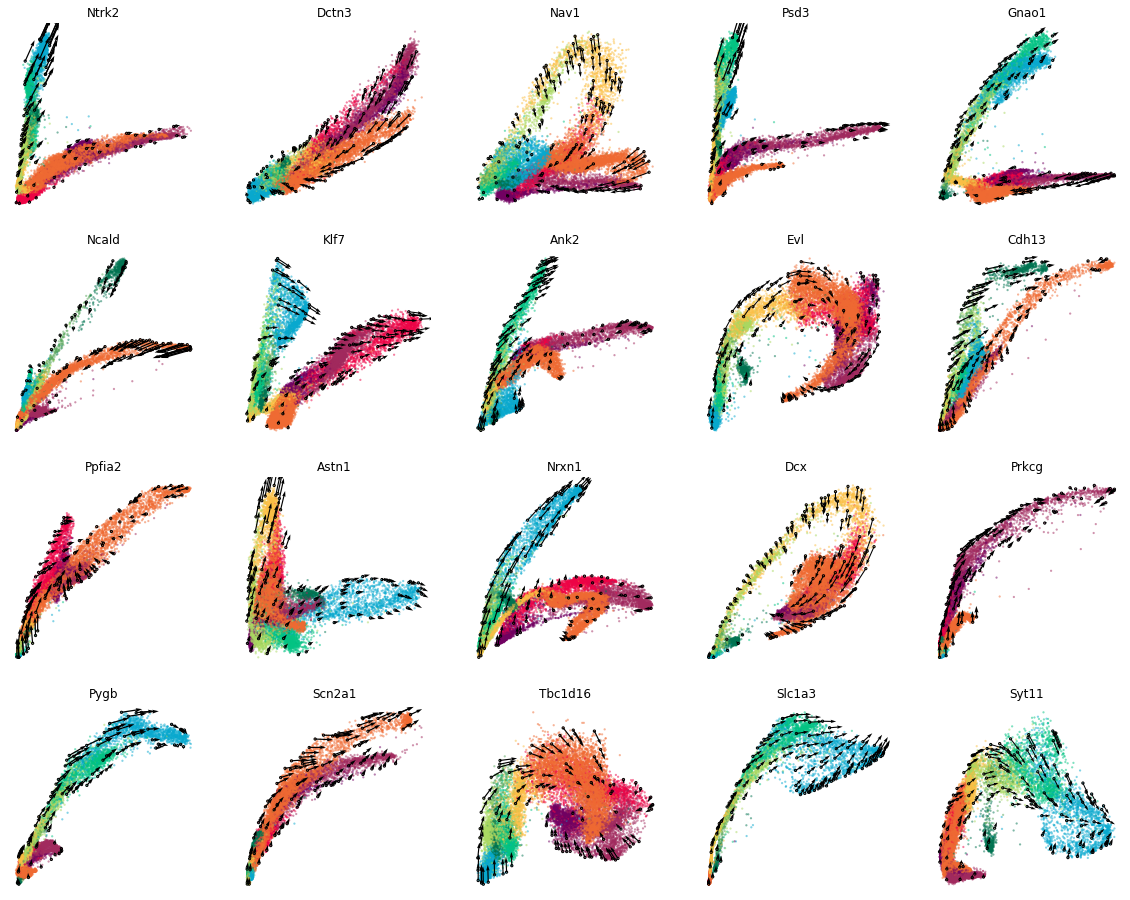

In [73]:
%autoreload 2

gene_list=["Ank","Abcc8","Sulf2","Tcp11","Nfib","Ppp3ca",
        "Rbfox3","Cdk1","Gng12","Map1b","Cpe",
        "Gnao1","Pcsk2","Tmem163","Pak3","Wfdc15b",
        "Nnat","Anxa4","Actn4","Btbd17","Dcdc2a",
        "Adk","Smoc1","Mapre3","Pim2","Tspan7",
        "Top2a","Rap1b"]
gene_list=['Ntrk2','Dctn3','Nav1','Psd3',\
           'Gnao1','Ncald','Klf7','Ank2',\
           'Evl','Cdh13','Ppfia2','Astn1',\
           'Nrxn1','Dcx','Prkcg','Pygb','Scn2a1',\
            'Tbc1d16','Slc1a3','Syt11']
ncols=5

height=math.ceil(len(gene_list)/ncols)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='splice',
        y='unsplice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_neuro,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene=gene_list[i])
    
    ax.set_title(gene_list[i])
    ax.axis('off')

plt.show()

## Load velocity estimation result of 2159 genes

In [6]:
cellDancer_df_file='/Users/pengzhizhang/pseudotime/data/neuro/velocity_result/celldancer_estimation.csv'
cellDancer_df=pd.read_csv(cellDancer_df_file)
cellDancer_df

,cellIndex,gene_name,splice,unsplice,splice_predict,unsplice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2
0,0,Stom,0.006305,0.000000,0.005999,0.000520,0.001040,0.427941,0.096933,0.070205,10X83_2:AAACGGGGTCTCTTTAx,ImmGranule2,18.931086,-1.862429
1,1,Stom,0.006305,0.000000,0.005999,0.000520,0.001040,0.427941,0.096933,0.070205,10X83_2:AACCATGGTTCAACCAx,ImmGranule2,18.419891,-1.282895
2,2,Stom,0.008353,0.000000,0.007948,0.000517,0.001034,0.427932,0.096955,0.070205,10X83_2:AACACGTTCTGAAAGAx,CA2-3-4,2.369887,16.868419
3,3,Stom,0.000000,0.000000,0.000000,0.000528,0.001056,0.427962,0.096864,0.070205,10X83_2:AAAGATGCATTGAGCTx,CA,-5.351040,10.676485
4,4,Stom,0.000000,0.000000,0.000000,0.000528,0.001056,0.427962,0.096864,0.070205,10X83_2:AACCATGTCTACTTACx,CA1-Sub,-6.189126,11.754900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39164255,18135,Prmt8,0.262922,0.131071,0.267516,0.142995,0.100474,0.584625,0.256505,0.112949,10X84_3:TTTCCTCCACCATCCTx,ImmGranule1,10.812611,-2.487668
39164256,18136,Prmt8,0.531809,0.198949,0.519074,0.199198,0.114583,0.573442,0.262416,0.112949,10X84_3:TTTGTCACATGAAGTAx,CA2-3-4,8.246204,23.482788
39164257,18137,Prmt8,0.212177,0.173362,0.235597,0.179191,0.112267,0.580340,0.253414,0.112949,10X84_3:TTTCCTCCACGGTAAGx,nIPC,-3.441272,-4.917364
39164258,18138,Prmt8,0.338159,0.216978,0.357323,0.213939,0.118856,0.575789,0.256112,0.112949,10X84_3:TTTGTCAAGCGTCAAGx,ImmGranule2,16.394199,-6.143549


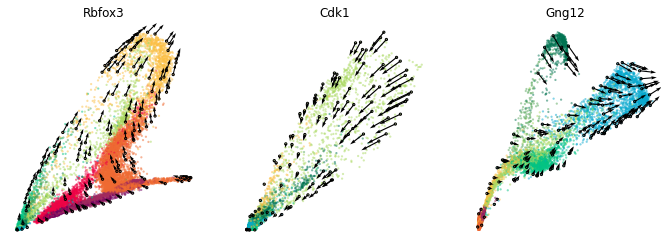

In [8]:
gene_list=["Ank","Abcc8","Sulf2","Tcp11","Nfib","Ppp3ca",
        "Rbfox3","Cdk1","Gng12","Map1b","Cpe",
        "Gnao1","Pcsk2","Tmem163","Pak3","Wfdc15b",
        "Nnat","Anxa4","Actn4","Btbd17","Dcdc2a",
        "Adk","Smoc1","Mapre3","Pim2","Tspan7",
        "Top2a","Rap1b"][6:9]

ncols=5

height=math.ceil(len(gene_list)/5)*4
fig = plt.figure(figsize=(20,height))
# fig = plt.figure(figsize=(20,20))
for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='splice',
        y='unsplice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_neuro,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene=gene_list[i])
    
    ax.set_title(gene_list[i])
    ax.axis("off")

plt.show()

## Compute Cell Velocity

(genes, cells): (2157, 18140)
Caution! Overwriting the 'velocity' columns.
After downsampling, there are  888 cells.


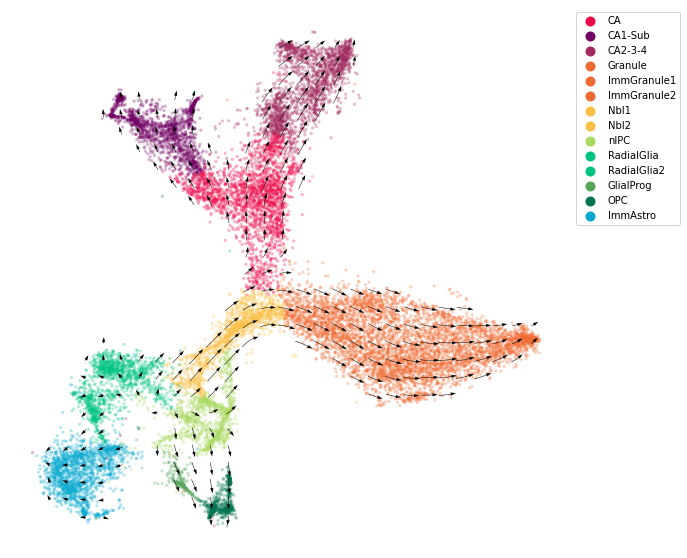

In [17]:
%autoreload 2

# Set Parameters
projection_neighbor_choice='embedding'
expression_scale=None
projection_neighbor_size=200
speed_up=(60,60)

# Compute cell velocity
cellDancer_df=compute(cellDancer_df=cellDancer_df,
              projection_neighbor_choice=projection_neighbor_choice,
              expression_scale=expression_scale,
              projection_neighbor_size=projection_neighbor_size,
              speed_up=speed_up)

# Plot cell velocity
# Set Parameters
min_mass=2
arrow_grid=(30,30)
alpha_inside=0.3


fig, ax = plt.subplots(figsize=(10,10))
im = cdplt.cell.scatter_cell(ax,cellDancer_df, colors=colormap.colormap_neuro, alpha=alpha_inside, s=10,
             velocity=True, legend='on',min_mass=min_mass,arrow_grid=arrow_grid)
ax.axis('off')
plt.show()

## Estimate Pseudotime

Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8880/8880 [00:44<00:00, 197.86it/s]


use path_similarity:  0.19375
There are 5 clusters.
[0 1 2 3 4]


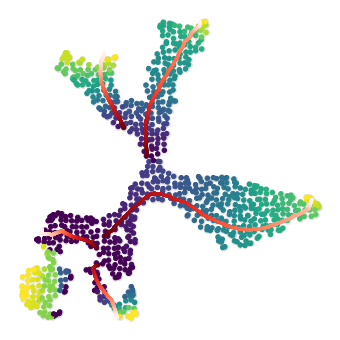




Cluster  0
Total cells in the cluster:  469
MAX allowed zero time cells:  23
MAX allowed terminal cells:  23
Only  6  terminal cells left.
[440, 455, 541, 544, 600, 637]
139  zero cells left.
Sample trajs for zero-time cells in cluster  0   ...
Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]



Cluster  0
Total cells in the cluster:  139
MAX allowed zero time cells:  23
MAX allowed terminal cells:  23
Only  5  terminal cells left.
[585, 623, 645, 819, 860]
65  zero cells left.
Sample trajs for zero-time cells in cluster  0   ...
Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]



Cluster  0
Total cells in the cluster:  65
MAX allowed zero time cells:  23
MAX allowed terminal cells:  23
Only  16  zero cells left. 
[27, 50, 129, 149, 193, 202, 204, 258, 364, 403, 413, 471, 555, 670, 681, 682]
Only  3  terminal cells left.
[151, 391, 643]
number of paths:  3
number of subclusters:  3

Display reference paths for cluster 0


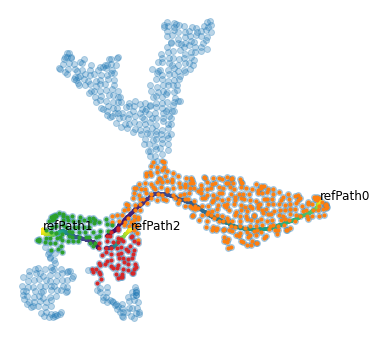


intercluster cell time adjustment
number of cells:  469
Cutoff is  0.04654971772122771
Number of nodes:  3
clusterIDs:  [0, 1, 2]

Consolidating time between clusters  0  and  1 ...
pair_cellIDs:  (628, 738)
pair_cellIDs:  (333, 876)
pair_cellIDs:  (747, 386)

Peak mode:  least_shift


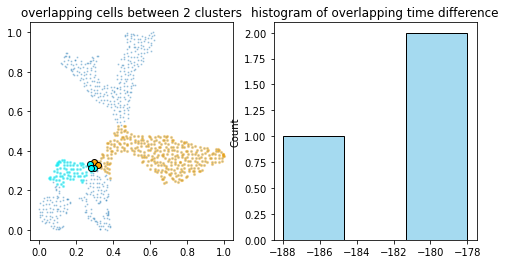

Time shift is:  -178
The overlapping cells are: 
cell  747  from cluster  0  and  386  from cluster  1

Consolidating time between clusters  0  and  2 ...
pair_cellIDs:  (839, 391)
pair_cellIDs:  (815, 643)
pair_cellIDs:  (747, 842)
pair_cellIDs:  (548, 151)
pair_cellIDs:  (587, 457)
pair_cellIDs:  (628, 237)
pair_cellIDs:  (729, 501)

Peak mode:  most_frequent_shift


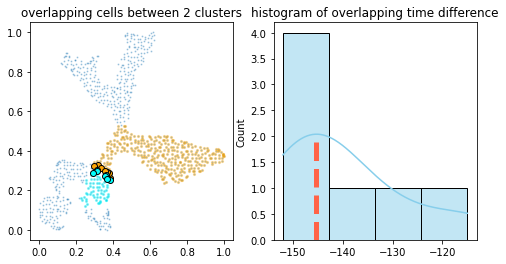

Time shift is:  -145
The overlapping cells are: 
cell  548  from cluster  0  and  151  from cluster  2

Consolidating time between clusters  1  and  2 ...
pair_cellIDs:  (850, 237)
pair_cellIDs:  (425, 204)
pair_cellIDs:  (80, 682)
pair_cellIDs:  (738, 842)
pair_cellIDs:  (343, 90)
pair_cellIDs:  (446, 102)
pair_cellIDs:  (414, 22)
pair_cellIDs:  (386, 457)

Peak mode:  most_frequent_shift


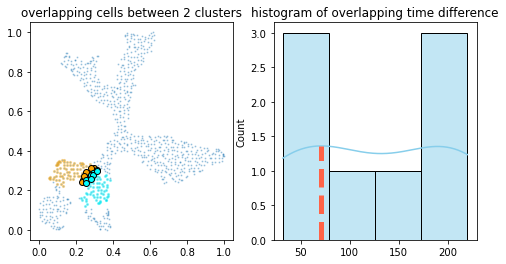

Time shift is:  73
The overlapping cells are: 
cell  850  from cluster  1  and  237  from cluster  2


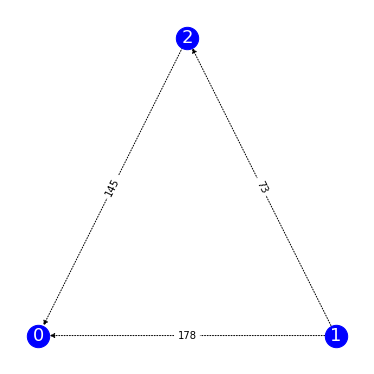

There exists a cycle in the cluster graph.
Removing the node of the smallest cluster
Connected components:  {0, 1}
Connected components:  {2}
All nodes adjustment:  {0: 0, 1: -178, 2: 0}



Cluster  1
Total cells in the cluster:  189
MAX allowed zero time cells:  10
MAX allowed terminal cells:  10
Only  9  zero cells left. 
[5, 32, 43, 103, 195, 238, 299, 357, 776]
Only  2  terminal cells left.
[641, 873]
number of paths:  1
number of subclusters:  1

Display reference paths for cluster 1


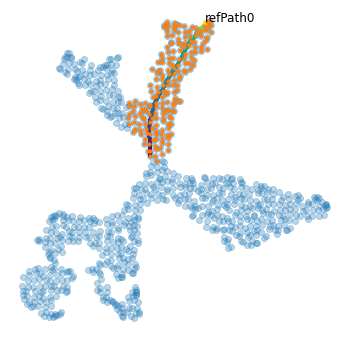




Cluster  2
Total cells in the cluster:  100
MAX allowed zero time cells:  10
MAX allowed terminal cells:  10
Only  3  zero cells left. 
[292, 311, 358]
Only  4  terminal cells left.
[229, 605, 663, 723]
number of paths:  1
number of subclusters:  1

Display reference paths for cluster 2


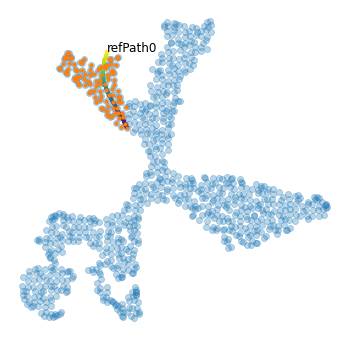




Cluster  3
Total cells in the cluster:  87
MAX allowed zero time cells:  10
MAX allowed terminal cells:  10
11  zero cells left.
Sample trajs for zero-time cells in cluster  3   ...
Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]



Cluster  3
Total cells in the cluster:  11
MAX allowed zero time cells:  10
MAX allowed terminal cells:  10
Only  4  zero cells left. 
[345, 533, 557, 707]
Only  3  terminal cells left.
[224, 359, 402]
18  terminal cells left.
Sample trajs for terminal cells in cluster  3  ...
Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]



Cluster  3
Total cells in the cluster:  18
MAX allowed zero time cells:  10
MAX allowed terminal cells:  10
Only  2  zero cells left. 
[530, 582]
Only  6  terminal cells left.
[100, 444, 478, 621, 680, 763]
number of paths:  3
number of subclusters:  3

Display reference paths for cluster 3


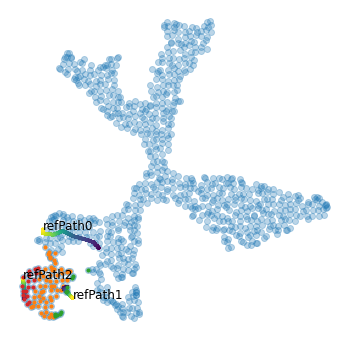


intercluster cell time adjustment
number of cells:  87
Cutoff is  0.021128102402590176
Number of nodes:  3
clusterIDs:  [0, 1, 2]

Consolidating time between clusters  0  and  1 ...
pair_cellIDs:  (550, 496)
pair_cellIDs:  (437, 770)
pair_cellIDs:  (825, 533)
pair_cellIDs:  (846, 370)
pair_cellIDs:  (178, 707)
pair_cellIDs:  (389, 345)

Peak mode:  most_frequent_shift


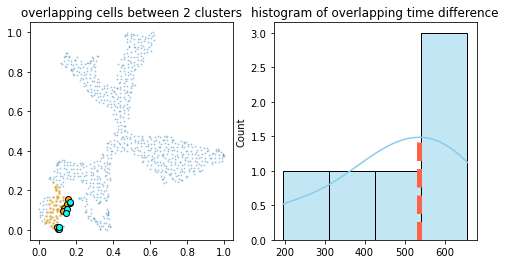

Time shift is:  575
The overlapping cells are: 
cell  178  from cluster  0  and  707  from cluster  1

Consolidating time between clusters  0  and  2 ...
pair_cellIDs:  (800, 621)
pair_cellIDs:  (827, 510)
pair_cellIDs:  (490, 582)
pair_cellIDs:  (547, 786)
pair_cellIDs:  (726, 785)

Peak mode:  most_frequent_shift


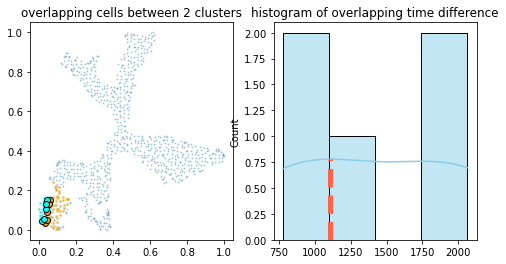

Time shift is:  911
The overlapping cells are: 
cell  726  from cluster  0  and  785  from cluster  2

Consolidating time between clusters  1  and  2 ...
No close cells between clusters	 (1, 2)


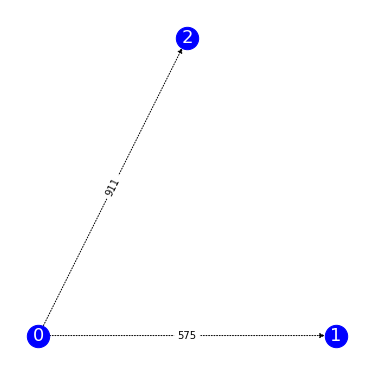

Connected components:  {0, 1, 2}
All nodes adjustment:  {0: 0, 1: 575, 2: 911}



Cluster  4
Total cells in the cluster:  43
MAX allowed zero time cells:  10
MAX allowed terminal cells:  10
Only  4  zero cells left. 
[344, 581, 833, 887]
Only  7  terminal cells left.
[609, 611, 631, 651, 664, 732, 849]
number of paths:  1
number of subclusters:  1

Display reference paths for cluster 4


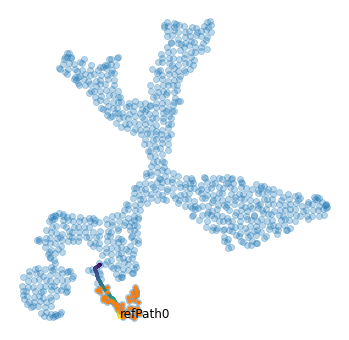




All intra cluster cell time has been resolved.




intercluster cell time adjustment
number of cells:  888
Cutoff is  0.05678683071249158
Number of nodes:  5
clusterIDs:  [0, 1, 2, 3, 4]

Consolidating time between clusters  0  and  1 ...
pair_cellIDs:  (308, 5)
pair_cellIDs:  (558, 195)
pair_cellIDs:  (640, 43)
pair_cellIDs:  (176, 238)

Peak mode:  least_shift


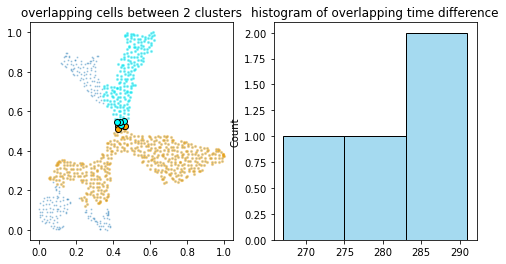

Time shift is:  267
The overlapping cells are: 
cell  558  from cluster  0  and  195  from cluster  1

Consolidating time between clusters  0  and  2 ...
No close cells between clusters	 (0, 2)

Consolidating time between clusters  0  and  3 ...
pair_cellIDs:  (248, 325)
pair_cellIDs:  (50, 557)
pair_cellIDs:  (416, 99)
pair_cellIDs:  (64, 426)
pair_cellIDs:  (481, 54)
pair_cellIDs:  (569, 315)
pair_cellIDs:  (266, 48)
pair_cellIDs:  (145, 538)

Peak mode:  most_frequent_shift


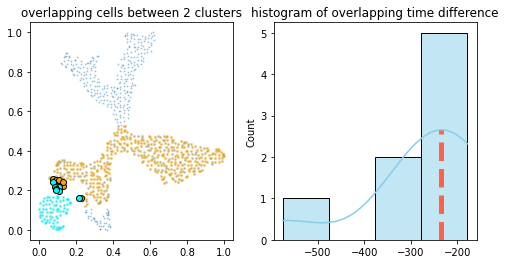

Time shift is:  -225
The overlapping cells are: 
cell  64  from cluster  0  and  426  from cluster  3

Consolidating time between clusters  0  and  4 ...
pair_cellIDs:  (27, 833)
pair_cellIDs:  (670, 344)
pair_cellIDs:  (157, 199)
pair_cellIDs:  (471, 581)

Peak mode:  least_shift


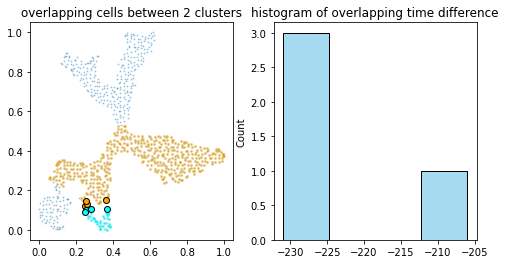

Time shift is:  -206
The overlapping cells are: 
cell  157  from cluster  0  and  199  from cluster  4

Consolidating time between clusters  1  and  2 ...
pair_cellIDs:  (188, 18)
pair_cellIDs:  (78, 292)
pair_cellIDs:  (226, 334)
pair_cellIDs:  (265, 156)
pair_cellIDs:  (179, 375)
pair_cellIDs:  (331, 358)
pair_cellIDs:  (7, 311)
pair_cellIDs:  (53, 217)
pair_cellIDs:  (390, 126)
pair_cellIDs:  (142, 406)
pair_cellIDs:  (47, 324)

Peak mode:  most_frequent_shift


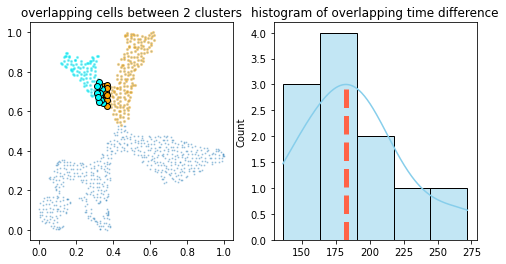

Time shift is:  176
The overlapping cells are: 
cell  390  from cluster  1  and  126  from cluster  2

Consolidating time between clusters  1  and  3 ...
No close cells between clusters	 (1, 3)

Consolidating time between clusters  1  and  4 ...
No close cells between clusters	 (1, 4)

Consolidating time between clusters  2  and  3 ...
No close cells between clusters	 (2, 3)

Consolidating time between clusters  2  and  4 ...
No close cells between clusters	 (2, 4)

Consolidating time between clusters  3  and  4 ...
No close cells between clusters	 (3, 4)


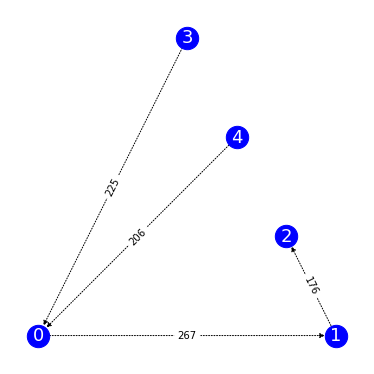

Connected components:  {0, 1, 2, 3, 4}
All nodes adjustment:  {0: 0, 1: 267, 2: 443, 3: -225, 4: -206}


All inter cluster cell time has been resolved.



There are 18140 cells.


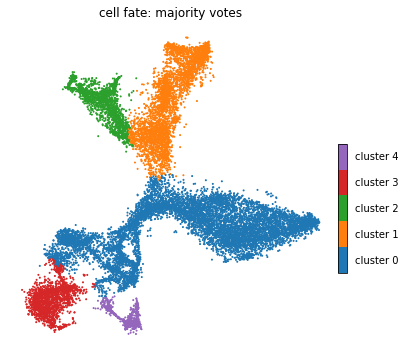

--- 161.65610885620117 seconds ---


In [18]:
%autoreload 2

dt = 0.001
t_total = {0.001: 10000}
n_repeats = 10

downsample_step=(60,60)
grid = (30, 30)
load_cellDancer = pseudo_time(
    cellDancer_df=cellDancer_df, 
    grid=grid, 
    dt=dt, 
    t_total=t_total[dt], 
    n_repeats=n_repeats, 
    speed_up=speed_up,
    n_paths = 5,
    psrng_seeds_diffusion=[i for i in range(n_repeats)],
    activate_umap_paths_divider=False,
    n_jobs=12)

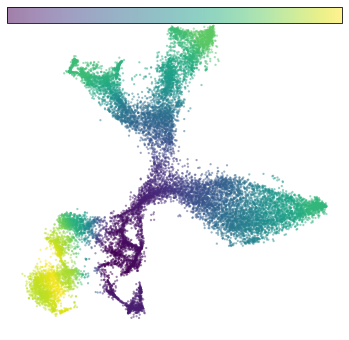

In [19]:
## Plot Pseudotime
fig, ax = plt.subplots(figsize=(6,6))
im=cdplt.cell.scatter_cell(ax,cellDancer_df, colors='pseudotime', alpha=0.5, 
             velocity=False)
ax.axis('off')
plt.show()

## Gene Pseudotime

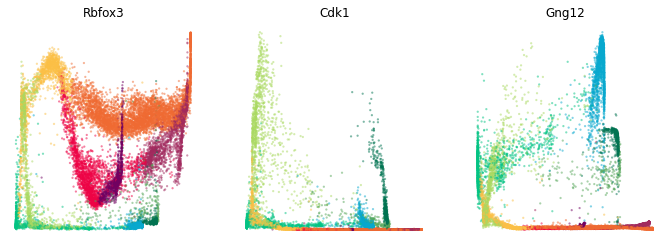

In [16]:

ncols=5
fig = plt.figure(figsize=(20,4))
for i in range(len(gene_list[0:5])):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='pseudotime',
        y='splice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_neuro,
        alpha=0.5, 
        s = 5,
        velocity=False,
        gene=gene_list[i])

    ax.set_title(gene_list[i])
    ax.axis('off')

## Gene Parameter in Cell Level

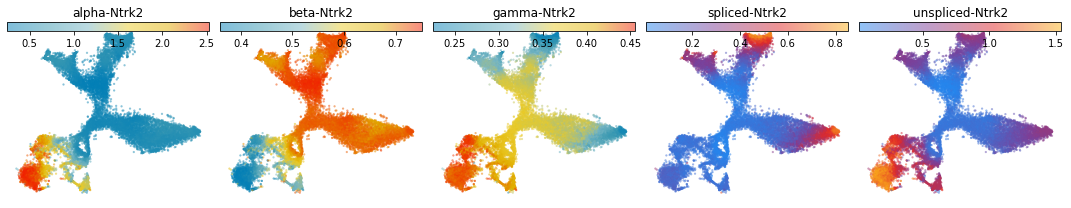

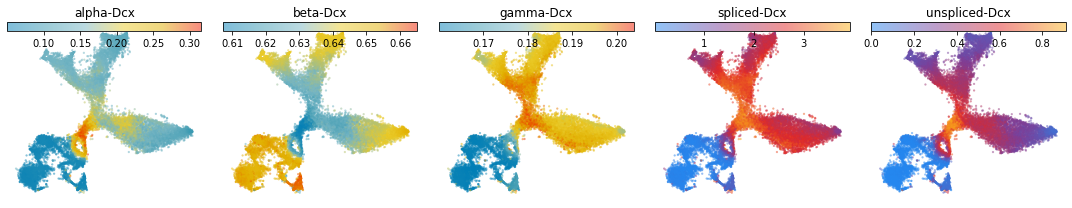

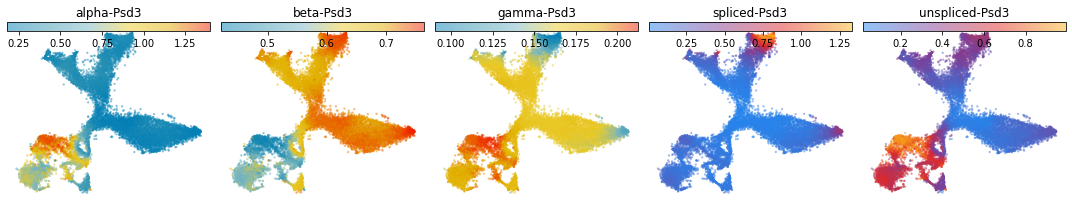

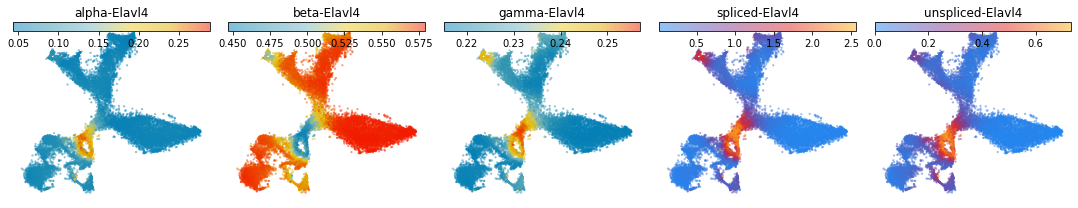

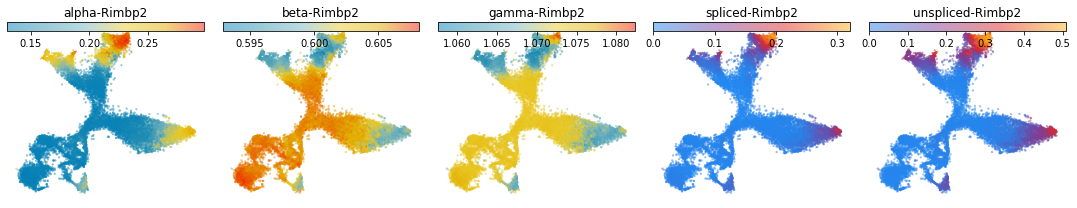

In [64]:
gene_samples=['Ntrk2','Dcx','Psd3','Elavl4','Rimbp2']
for gene in gene_samples:
    fig, ax = plt.subplots(ncols=5, figsize=(15,3))
    cdplt.cell.scatter_cell(ax[0],cellDancer_df, colors='alpha', 
                 gene=gene, velocity=False)
    cdplt.cell.scatter_cell(ax[1],cellDancer_df, colors='beta', 
                 gene=gene, velocity=False)
    cdplt.cell.scatter_cell(ax[2],cellDancer_df, colors='gamma', 
                 gene=gene, velocity=False)
    cdplt.cell.scatter_cell(ax[3],cellDancer_df, colors='splice', 
                 gene=gene, velocity=False)
    cdplt.cell.scatter_cell(ax[4],cellDancer_df, colors='unsplice', 
                 gene=gene, velocity=False)
    ax[0].axis('off')
    ax[1].axis('off')
    ax[2].axis('off')
    ax[3].axis('off')
    ax[4].axis('off')
    ax[0].set_title('alpha-'+gene)
    ax[1].set_title('beta-'+gene)
    ax[2].set_title('gamma-'+gene)
    ax[3].set_title('spliced-'+gene)
    ax[4].set_title('unspliced-'+gene)
    plt.tight_layout()
    plt.show()

## UMAP using alpha, beta, and gamma

In [31]:
cellDancer_df=embedding(cellDancer_df,'alpha')
cellDancer_df=embedding(cellDancer_df,'beta')
cellDancer_df=embedding(cellDancer_df,'gamma')
cellDancer_df=embedding(cellDancer_df,'alpha_beta_gamma')

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


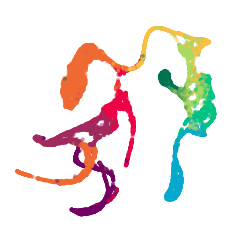

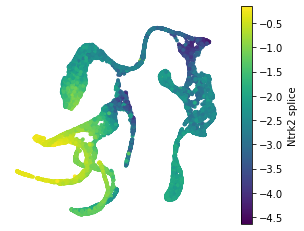

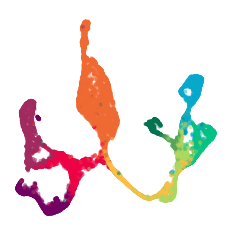

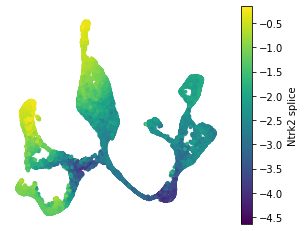

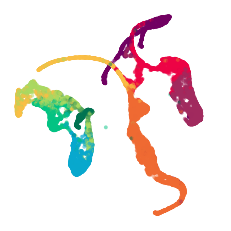

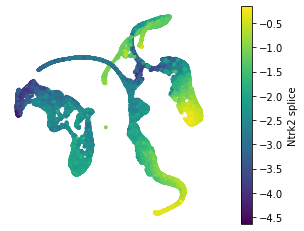

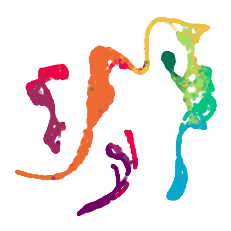

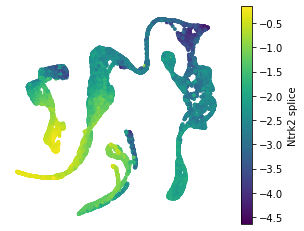

In [35]:
cdplt.cell.plot_kinetic_para('alpha',cellDancer_df,color_map=cdplt.colormap.colormap_neuro, save_path=None,title=None)
cdplt.cell.plot_kinetic_para('alpha',cellDancer_df,gene='Ntrk2',color_map=cdplt.colormap.colormap_neuro ,save_path=None,title=None)
cdplt.cell.plot_kinetic_para('beta',cellDancer_df,color_map=cdplt.colormap.colormap_neuro ,save_path=None,title=None)
cdplt.cell.plot_kinetic_para('beta',cellDancer_df,gene='Ntrk2',color_map=cdplt.colormap.colormap_neuro ,save_path=None,title=None)
cdplt.cell.plot_kinetic_para('gamma',cellDancer_df,color_map=cdplt.colormap.colormap_neuro,save_path=None,title=None)
cdplt.cell.plot_kinetic_para('gamma',cellDancer_df,gene='Ntrk2',color_map=cdplt.colormap.colormap_neuro ,save_path=None,title=None)
cdplt.cell.plot_kinetic_para('alpha_beta_gamma',cellDancer_df,color_map=cdplt.colormap.colormap_neuro ,save_path=None,title=None)
cdplt.cell.plot_kinetic_para('alpha_beta_gamma',cellDancer_df,gene='Ntrk2',color_map=cdplt.colormap.colormap_neuro ,save_path=None,title=None)